In [1]:
#import packages
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt


In [2]:
#import data (X - selected features)
X1=np.load('dataset_diabetes/tree_selected_25_X.npy',allow_pickle=True) #decision tree top 25
X2=np.load('dataset_diabetes/SVD_selected_25_X.npy',allow_pickle=True) # SVD top 25

#import and format Y (labels for our classifier - readmitted=1 or not (at least not soon)=0)
readmission=np.load('dataset_diabetes/Y.npy',allow_pickle=True)
my_list = np.where(readmission == 'NO', 0, readmission)
my_list2 = np.where(my_list == '>30', 0, my_list)
Y0 = np.where(my_list2 == '<30', 1, my_list2)
Y=list(Y0)

# Check to make sure data is size I expect

In [3]:
X1.shape # features chosen by decision tree (binary, meaningful)

(101766, 25)

In [4]:
X2.shape # features chosen by SVD - not binary, not rly meaningful

(101766, 25)

In [5]:
len(Y)

101766

# Split into train and test data sets

In [6]:
# relabel X arrays
X_DT = X1
X_SVD = X2

# Split data
XDT_train, XDT_test, YDT_train, YDT_test = train_test_split(X_DT, Y, test_size=0.33, random_state=1)
XSVD_train, XSVD_test, YSVD_train, YSVD_test = train_test_split(X_SVD, Y, test_size=0.33, random_state=1)

In [7]:
XDT_train.shape

(68183, 25)

In [8]:
XSVD_train.shape

(68183, 25)

# Logistic Regression Models

## Default Logistic Regression

In [9]:
### Default Log regression
DT_logit = LogisticRegression(random_state=1, max_iter=10000,tol=1e-8, penalty='none').fit(XDT_train, YDT_train)
SVD_logit = LogisticRegression(random_state=1, max_iter=10000,tol=1e-8, penalty='none').fit(XSVD_train, YSVD_train)

# Use model to make predictions
YhatDT_train = DT_logit.predict(XDT_train)
YhatDT_test = DT_logit.predict(XDT_test)
YhatSVD_train = SVD_logit.predict(XSVD_train)
YhatSVD_test = SVD_logit.predict(XSVD_test)

# Confusion matricies
CM_SVD_Train = confusion_matrix(YSVD_train,YhatSVD_train);
CM_SVD_Test = confusion_matrix(YSVD_test,YhatSVD_test);

CM_Tree_Train = confusion_matrix(YDT_train,YhatDT_train);
CM_Tree_Test = confusion_matrix(YDT_test,YhatDT_test);

print('SVD Train Conf. Matrix: '+'\n'+str(CM_SVD_Train)+'\n')
print('SVD Test Conf. Matrix: '+'\n'+str(CM_SVD_Test)+'\n')
print('Tree Train Conf. Matrix: '+'\n'+str(CM_Tree_Train)+'\n')
print('Tree Test Conf. Matrix: '+'\n'+str(CM_Tree_Test))

# Score
SVD_Train_Correct = sum(np.diag(CM_SVD_Train))
SVD_Train_Total = len(XSVD_train)
print('The percentage of correct training assignments is: ',SVD_Train_Correct/SVD_Train_Total)

SVD_Test_Correct = sum(np.diag(CM_SVD_Test))
SVD_Test_Total = len(XSVD_test)
print('The percentage of correct test assignments is: ',SVD_Test_Correct/SVD_Test_Total)

SVD Train Conf. Matrix: 
[[60483     0]
 [ 7700     0]]

SVD Test Conf. Matrix: 
[[29926     0]
 [ 3657     0]]

Tree Train Conf. Matrix: 
[[60381   102]
 [ 7590   110]]

Tree Test Conf. Matrix: 
[[29855    71]
 [ 3613    44]]
The percentage of correct training assignments is:  0.8870686241438481
The percentage of correct test assignments is:  0.8911056189143317


## Class weight: balanced

In [10]:
balancedDT_logit = LogisticRegression(random_state=1, max_iter=10000,tol=1e-8, penalty='none',class_weight='balanced').fit(XDT_train, YDT_train)
balancedSVD_logit = LogisticRegression(random_state=1, max_iter=10000,tol=1e-8, penalty='none',class_weight='balanced').fit(XSVD_train, YSVD_train)

# Use model to make predictions
YhatDT_train = balancedDT_logit.predict(XDT_train)
YhatDT_test = balancedDT_logit.predict(XDT_test)
YhatSVD_train = balancedSVD_logit.predict(XSVD_train)
YhatSVD_test = balancedSVD_logit.predict(XSVD_test)

# Confusion matricies
CM_SVD_Train = confusion_matrix(YSVD_train,YhatSVD_train);
CM_SVD_Test = confusion_matrix(YSVD_test,YhatSVD_test);

CM_Tree_Train = confusion_matrix(YDT_train,YhatDT_train);
CM_Tree_Test = confusion_matrix(YDT_test,YhatDT_test);

print('SVD Train Conf. Matrix: '+'\n'+str(CM_SVD_Train)+'\n')
print('SVD Test Conf. Matrix: '+'\n'+str(CM_SVD_Test)+'\n')
print('Tree Train Conf. Matrix: '+'\n'+str(CM_Tree_Train)+'\n')
print('Tree Test Conf. Matrix: '+'\n'+str(CM_Tree_Test))

# Score
SVD_Train_Correct = sum(np.diag(CM_SVD_Train))
SVD_Train_Total = len(XSVD_train)
print('The percentage of correct training assignments is: ',SVD_Train_Correct/SVD_Train_Total)

SVD_Test_Correct = sum(np.diag(CM_SVD_Test))
SVD_Test_Total = len(XSVD_test)
print('The percentage of correct test assignments is: ',SVD_Test_Correct/SVD_Test_Total)

SVD Train Conf. Matrix: 
[[36898 23585]
 [ 3290  4410]]

SVD Test Conf. Matrix: 
[[18125 11801]
 [ 1552  2105]]

Tree Train Conf. Matrix: 
[[42500 17983]
 [ 3670  4030]]

Tree Test Conf. Matrix: 
[[20864  9062]
 [ 1707  1950]]
The percentage of correct training assignments is:  0.6058401654371324
The percentage of correct test assignments is:  0.60238811303338


## Custom class weights

Here, we test a few values to see how the class weights affect the accuracy of our model. We use this information to pick a range to loop through below.

In [11]:
# {0:.1, 1:.9} Quite close to "balanced" since this is about the ratio seen in data
custombalancedDT_logit = LogisticRegression(random_state=1, max_iter=10000,tol=1e-8, penalty='none',class_weight={0:.1, 1:.9}).fit(XDT_train, YDT_train)
custombalancedSVD_logit = LogisticRegression(random_state=1, max_iter=10000,tol=1e-8, penalty='none',class_weight={0:.1, 1:.9}).fit(XSVD_train, YSVD_train)

# Use model to make predictions
YhatDT_train = custombalancedDT_logit.predict(XDT_train)
YhatDT_test = custombalancedDT_logit.predict(XDT_test)
YhatSVD_train = custombalancedSVD_logit.predict(XSVD_train)
YhatSVD_test = custombalancedSVD_logit.predict(XSVD_test)

# Confusion matricies
CM_SVD_Train = confusion_matrix(YSVD_train,YhatSVD_train);
CM_SVD_Test = confusion_matrix(YSVD_test,YhatSVD_test);

CM_Tree_Train = confusion_matrix(YDT_train,YhatDT_train);
CM_Tree_Test = confusion_matrix(YDT_test,YhatDT_test);

print('SVD Train Conf. Matrix: '+'\n'+str(CM_SVD_Train)+'\n')
print('SVD Test Conf. Matrix: '+'\n'+str(CM_SVD_Test)+'\n')
print('Tree Train Conf. Matrix: '+'\n'+str(CM_Tree_Train)+'\n')
print('Tree Test Conf. Matrix: '+'\n'+str(CM_Tree_Test))

# Score
SVD_Train_Correct = sum(np.diag(CM_SVD_Train))
SVD_Train_Total = len(XSVD_train)
print('The percentage of correct training assignments is: ',SVD_Train_Correct/SVD_Train_Total)

SVD_Test_Correct = sum(np.diag(CM_SVD_Test))
SVD_Test_Total = len(XSVD_test)
print('The percentage of correct test assignments is: ',SVD_Test_Correct/SVD_Test_Total)

SVD Train Conf. Matrix: 
[[30708 29775]
 [ 2443  5257]]

SVD Test Conf. Matrix: 
[[14993 14933]
 [ 1139  2518]]

Tree Train Conf. Matrix: 
[[36172 24311]
 [ 2807  4893]]

Tree Test Conf. Matrix: 
[[17607 12319]
 [ 1295  2362]]
The percentage of correct training assignments is:  0.5274775237229221
The percentage of correct test assignments is:  0.5214245302682905


In [12]:
# {0:.9, 1:.1}
custombalancedDT_logit = LogisticRegression(random_state=1, max_iter=10000,tol=1e-8, penalty='none',class_weight={0:.9, 1:.1}).fit(XDT_train, YDT_train)
custombalancedSVD_logit = LogisticRegression(random_state=1, max_iter=10000,tol=1e-8, penalty='none',class_weight={0:.9, 1:.1}).fit(XSVD_train, YSVD_train)

# Use model to make predictions
YhatDT_train = custombalancedDT_logit.predict(XDT_train)
YhatDT_test = custombalancedDT_logit.predict(XDT_test)
YhatSVD_train = custombalancedSVD_logit.predict(XSVD_train)
YhatSVD_test = custombalancedSVD_logit.predict(XSVD_test)

# Confusion matricies
CM_SVD_Train = confusion_matrix(YSVD_train,YhatSVD_train);
CM_SVD_Test = confusion_matrix(YSVD_test,YhatSVD_test);

CM_Tree_Train = confusion_matrix(YDT_train,YhatDT_train);
CM_Tree_Test = confusion_matrix(YDT_test,YhatDT_test);

print('SVD Train Conf. Matrix: '+'\n'+str(CM_SVD_Train)+'\n')
print('SVD Test Conf. Matrix: '+'\n'+str(CM_SVD_Test)+'\n')
print('Tree Train Conf. Matrix: '+'\n'+str(CM_Tree_Train)+'\n')
print('Tree Test Conf. Matrix: '+'\n'+str(CM_Tree_Test))

# Score
SVD_Train_Correct = sum(np.diag(CM_SVD_Train))
SVD_Train_Total = len(XSVD_train)
print('The percentage of correct training assignments is: ',SVD_Train_Correct/SVD_Train_Total)

SVD_Test_Correct = sum(np.diag(CM_SVD_Test))
SVD_Test_Total = len(XSVD_test)
print('The percentage of correct test assignments is: ',SVD_Test_Correct/SVD_Test_Total)

SVD Train Conf. Matrix: 
[[60483     0]
 [ 7700     0]]

SVD Test Conf. Matrix: 
[[29926     0]
 [ 3657     0]]

Tree Train Conf. Matrix: 
[[60483     0]
 [ 7695     5]]

Tree Test Conf. Matrix: 
[[29926     0]
 [ 3653     4]]
The percentage of correct training assignments is:  0.8870686241438481
The percentage of correct test assignments is:  0.8911056189143317


In [13]:
# {0:.5, 1:.5}
custombalancedDT_logit = LogisticRegression(random_state=1, max_iter=10000,tol=1e-8, penalty='none',class_weight={0:.5, 1:.5}).fit(XDT_train, YDT_train)
custombalancedSVD_logit = LogisticRegression(random_state=1, max_iter=10000,tol=1e-8, penalty='none',class_weight={0:.5, 1:.5}).fit(XSVD_train, YSVD_train)

# Use model to make predictions
YhatDT_train = custombalancedDT_logit.predict(XDT_train)
YhatDT_test = custombalancedDT_logit.predict(XDT_test)
YhatSVD_train = custombalancedSVD_logit.predict(XSVD_train)
YhatSVD_test = custombalancedSVD_logit.predict(XSVD_test)

# Confusion matricies
CM_SVD_Train = confusion_matrix(YSVD_train,YhatSVD_train);
CM_SVD_Test = confusion_matrix(YSVD_test,YhatSVD_test);

CM_Tree_Train = confusion_matrix(YDT_train,YhatDT_train);
CM_Tree_Test = confusion_matrix(YDT_test,YhatDT_test);

print('SVD Train Conf. Matrix: '+'\n'+str(CM_SVD_Train)+'\n')
print('SVD Test Conf. Matrix: '+'\n'+str(CM_SVD_Test)+'\n')
print('Tree Train Conf. Matrix: '+'\n'+str(CM_Tree_Train)+'\n')
print('Tree Test Conf. Matrix: '+'\n'+str(CM_Tree_Test))

# Score
SVD_Train_Correct = sum(np.diag(CM_SVD_Train))
SVD_Train_Total = len(XSVD_train)
print('The percentage of correct training assignments is: ',SVD_Train_Correct/SVD_Train_Total)

SVD_Test_Correct = sum(np.diag(CM_SVD_Test))
SVD_Test_Total = len(XSVD_test)
print('The percentage of correct test assignments is: ',SVD_Test_Correct/SVD_Test_Total)

SVD Train Conf. Matrix: 
[[60483     0]
 [ 7700     0]]

SVD Test Conf. Matrix: 
[[29926     0]
 [ 3657     0]]

Tree Train Conf. Matrix: 
[[60381   102]
 [ 7590   110]]

Tree Test Conf. Matrix: 
[[29855    71]
 [ 3613    44]]
The percentage of correct training assignments is:  0.8870686241438481
The percentage of correct test assignments is:  0.8911056189143317


In [14]:
alphaweights = np.linspace(0,0.5,51)
print(alphaweights)

SVD_TrainAcc = [];
SVD_TestAcc = [];
DT_TrainAcc = [];
DT_TestAcc = [];

for alpha in enumerate(alphaweights):
    custombalancedDT_logit = LogisticRegression(random_state=1, max_iter=10000,tol=1e-8, penalty='none',class_weight={0:alpha[1], 1:(1-alpha[1])}).fit(XDT_train, YDT_train)
    custombalancedSVD_logit = LogisticRegression(random_state=1, max_iter=10000,tol=1e-8, penalty='none',class_weight={0:alpha[1], 1:(1-alpha[1])}).fit(XSVD_train, YSVD_train)
    
    # Use model to make predictions
    YhatDT_train = custombalancedDT_logit.predict(XDT_train)
    YhatDT_test = custombalancedDT_logit.predict(XDT_test)
    YhatSVD_train = custombalancedSVD_logit.predict(XSVD_train)
    YhatSVD_test = custombalancedSVD_logit.predict(XSVD_test)

    # Confusion matricies
    CM_SVD_Train = confusion_matrix(YSVD_train,YhatSVD_train);
    CM_SVD_Test = confusion_matrix(YSVD_test,YhatSVD_test);
    CM_DT_Train = confusion_matrix(YDT_train,YhatDT_train);
    CM_DT_Test = confusion_matrix(YDT_test,YhatDT_test);
    
    # Save scores
    SVD_TrainAcc.append(roc_auc_score(YSVD_train,custombalancedSVD_logit.predict(XSVD_train)));
    SVD_TestAcc.append(roc_auc_score(YSVD_test,custombalancedSVD_logit.predict(XSVD_test)));
    DT_TrainAcc.append(roc_auc_score(YDT_train,custombalancedDT_logit.predict(XDT_train)));
    DT_TestAcc.append(roc_auc_score(YDT_test,custombalancedDT_logit.predict(XDT_test)));

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5 ]


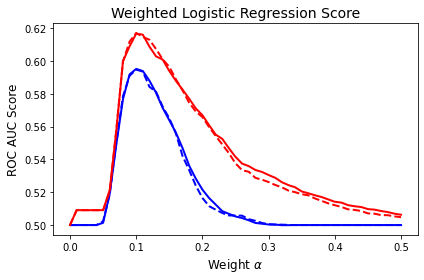

In [15]:
plt.plot(alphaweights,np.array(SVD_TrainAcc),'b-',linewidth=2)
plt.plot(alphaweights,np.array(SVD_TestAcc),'b--',linewidth=2)
plt.plot(alphaweights,np.array(DT_TrainAcc),'r-',linewidth=2)
plt.plot(alphaweights,np.array(DT_TestAcc),'r--',linewidth=2)
plt.xlabel('Weight '+r'$\alpha$',fontsize=12)
plt.ylabel('ROC AUC Score',fontsize=12)
plt.title('Weighted Logistic Regression Score',fontsize=14)
plt.tight_layout()
plt.show()

In [16]:
print('Best alpha SVD: '+str(alphaweights[np.where(SVD_TestAcc==max(SVD_TestAcc))][0]))
print('Best alpha DT: '+str(alphaweights[np.where(DT_TestAcc==max(DT_TestAcc))][0]))

Best alpha SVD: 0.1
Best alpha DT: 0.1
